/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,close
688238,2015-09-16,38.650002
688735,2015-09-17,38.700001
689232,2015-09-18,37.380001
689729,2015-09-21,37.450001
690226,2015-09-22,37.459999
...,...,...
848972,2016-12-23,54.840000
849472,2016-12-27,54.910000
849972,2016-12-28,54.299999
850472,2016-12-29,54.040001


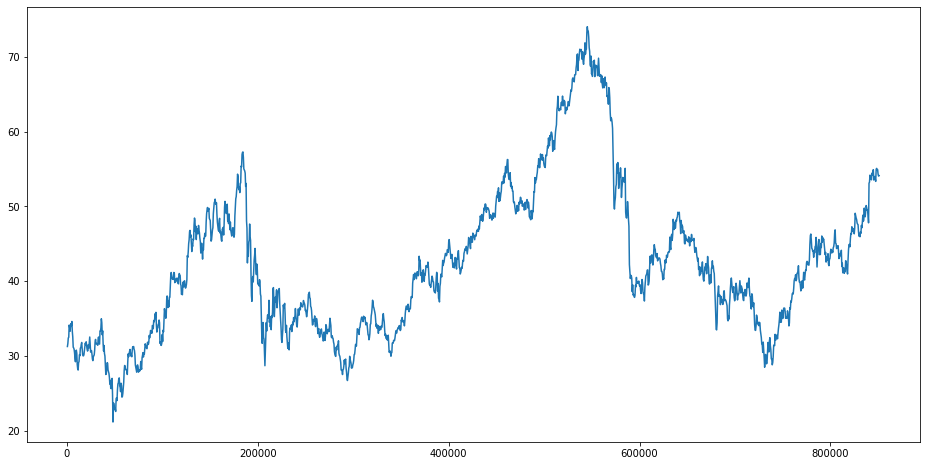

In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('prices-split-adjusted.csv')
pg = df[df['symbol'] == 'HAL']
pg.drop('symbol', axis = 1,  inplace=True)
pg.drop('open', axis = 1,  inplace=True)
pg.drop('low', axis = 1,  inplace=True)
pg.drop('high', axis = 1,  inplace=True)
pg.drop('volume', axis = 1,  inplace=True)
plt.figure(figsize=(16,8))
plt.plot(pg['close'], label='Close Price history')
pg.tail(327)

In [130]:
pg.drop('date', axis = 1,  inplace=True)
dataset = pg.values
train = dataset[0:1400,:]
valid = dataset[1400:,:]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
model = Sequential()
model.add(Dense(20,activation='tanh'))
model.add(Dense(10,activation='tanh'))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=64, batch_size=128, verbose=1)

Epoch 1/64
1370/1370 [==============================] - 3s 2ms/step - loss: 0.0969
Epoch 2/64
1370/1370 [==============================] - 1s 759us/step - loss: 0.0152
Epoch 3/64
1370/1370 [==============================] - 1s 735us/step - loss: 0.0091
Epoch 4/64
1370/1370 [==============================] - 1s 743us/step - loss: 0.0046
Epoch 5/64
1370/1370 [==============================] - 1s 851us/step - loss: 0.0026
Epoch 6/64
1370/1370 [==============================] - 1s 826us/step - loss: 0.0016
Epoch 7/64
1370/1370 [==============================] - 1s 793us/step - loss: 0.0014
Epoch 8/64
1370/1370 [==============================] - 1s 835us/step - loss: 0.0014
Epoch 9/64
1370/1370 [==============================] - 1s 793us/step - loss: 0.0013
Epoch 10/64
1370/1370 [==============================] - 1s 804us/step - loss: 0.0013
Epoch 11/64
1370/1370 [==============================] - 1s 775us/step - loss: 0.0013
Epoch 12/64
1370/1370 [==============================] - 1s 742us

In [131]:
inputs = pg[len(pg) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1.1968668544622578

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


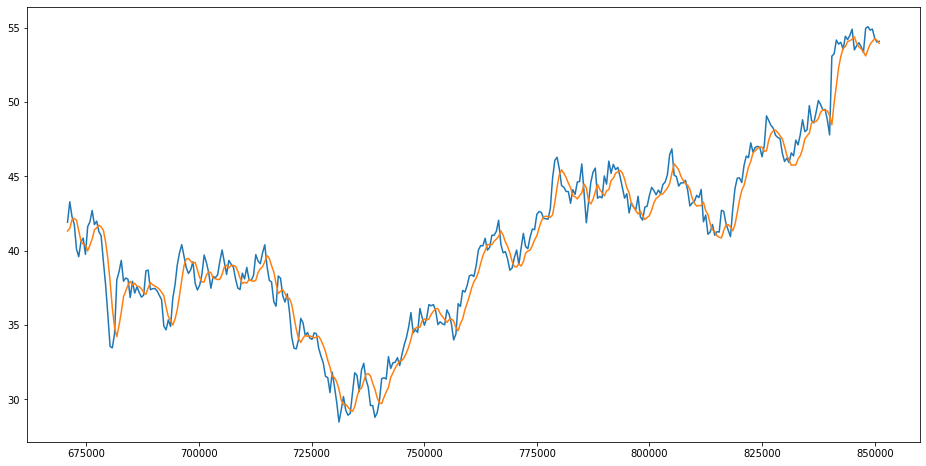

In [132]:
train = pg[:1400]
valid = pg[1400:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(valid[['close','Predictions']])

In [134]:
s = pg[len(pg) - 60:].values
s = s.reshape(-1,1)
s = scaler.transform(s)

In [135]:
s = np.reshape(s, (s.shape[1],s.shape[0],1))
closing_price = model.predict(s)
closing_price = scaler.inverse_transform(closing_price)
closing_price

array([[53.817642]], dtype=float32)